# Heart Disease Detection

Our project aims to heart disease detection based on characteristics of 14 attributes. Different machine learning models are applied to our project. We have investigated which model could show the best performance on the datasetper. The selected model is used to build up a webapp to help people detect the potential of heart disease.

The dataset used in our project was contributed to the UCI Machine Learning repository in 1989 which concerning heart disease diagnosis. Actually, there are four databases, but only the Cleveland database are applied in our project. While the databases have 76 raw attributes, only 14 of them are actually used. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Our model tests with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

### Attribute Information:
Only 14 attributes used: 
1. age: age in years 
2. sex: 1 = male; 0 = female 
3. cp: chest pain type:
   
   --Value 1: typical angina
   
   --Value 2: atypical angina
   
   --Value 3: non-anginal pain
   
   --Value 4: asymptomatic
4. trestbps: resting blood pressure(in mm Hg on admission to the hospital 
5. chol: serum cholestoral in md/dl 
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results:
   
   --Value 0: normal
   
   --Value 1: having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of > 0.005 mV)
   
   --Value 2: showing probable or definite left ventricular hypertrophy by Easter' criteria
8. thalach: maximum heart rate achieved  
9. exang: exercise induced angina(1 = yes; 0 = no) 
10. oldpeak: ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segament:
    
    --Value 1: upsloping
    
    --Value 2: flat
    
    --Value 3: downsloping
12. ca: number of major vessels(0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num (the predicted attribute): diagnosis of heart disease(angiographic desease status):
    
    --Value 0: < 50% diameter narrowing
    
    --Value 1: > 50% diameter narrowing
                                   

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from IPython.display import Image
import pydotplus
%matplotlib inline

In [42]:
# Load in data from the csv file
data = pd.read_csv('Cleveland.data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [43]:
data['ca'].value_counts()
data['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [44]:
# We just removes all the instances which have missing values.
data = data[data['ca'] != '?']
data = data[data['thal'] != '?']
data['ca'].value_counts()
data['thal'].value_counts()

3    164
7    115
6     18
Name: thal, dtype: int64

In [45]:
# Convert feature values from strings to integers.
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

In [46]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
0,29,1,0,31,64,1,2,49,0,22,2,0,1,0
1,33,1,3,40,111,0,2,10,1,15,1,3,0,1
2,33,1,3,14,60,0,2,29,1,25,1,2,2,1
3,3,1,2,22,80,0,0,84,0,32,2,0,0,0
4,7,0,1,22,35,0,2,71,0,14,0,0,0,0


The dataset description indicats that there are some missing values in attributes 'ca' and 'thal'. What we do is to clean the dataset simply by removing rows with missing values. From dataframe above, it can be seen that the dataset contains 297 samples and 14 attributes(the first column is label). All feature values are integers.

In [47]:
print(data.shape)

(297, 14)


In [48]:
# Split the dataset into training and testing set, with 20% of the data as the testing set
train, test = train_test_split(data, test_size = 0.2) 

# Training set
y_train = train.iloc[:, 13]
X_train = train.iloc[:, 0:13]

# Testing set
y_test = test.iloc[:, 13]
X_test = test.iloc[:, 0:13]

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Selection
## Logistic regression

In [74]:
LogReg = LogisticRegression()

# Train the model using the training set
LogReg.fit(X_train, y_train)

# Make predictions on testing set
LogReg.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [75]:
# Calculate R-squared on testing data
print('R^2 on testing data: %.2f' % LogReg.score(X_test, y_test))

R^2 on testing data: 0.88


[ 0.85416667  0.83333333  0.78723404  0.85106383  0.78723404]


Text(0.5,1,'results on 5 folds')

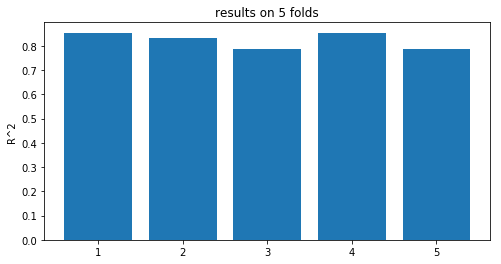

In [79]:
# Perform 5-fold cross validation on trainning set
results = cross_val_score(LogReg, X_train, y_train,cv = 5)
print(results)

fig = plt.figure(figsize=(8,4))
index = [1,2,3,4,5]
plt.bar(index, results)
plt.ylabel('R^2')
plt.title('results on 5 folds')

Area under the ROC curve : 0.921569


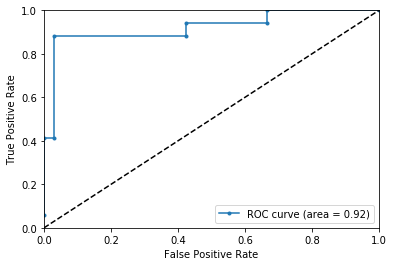

In [80]:
#Compute AUC ROC
X = data[['age','sex', 'cp', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slop','ca','thal']]
y = data['num']
def generate_auc(X,y,clf_class,**kwargs):
    random_state = np.random.RandomState(0)
    # training set and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Building up a Generating ROC Function
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    fig = plt.figure()
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

It can be seen from the graph above that the $R^2$ value is adound 83% for each fold. The value of AUC under ROC is 0.922.

## KNN Classification

In [81]:
# Find the optimal number of neighbors
for n in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    # Calculate the accuracy of prediction
    accuracy = accuracy_score(y_pred, y_test)
    print('The accuracy of prediction on testing data: %.2f' % accuracy)

The accuracy of prediction on testing data: 0.73
The accuracy of prediction on testing data: 0.77
The accuracy of prediction on testing data: 0.87
The accuracy of prediction on testing data: 0.87
The accuracy of prediction on testing data: 0.90
The accuracy of prediction on testing data: 0.82
The accuracy of prediction on testing data: 0.87
The accuracy of prediction on testing data: 0.82
The accuracy of prediction on testing data: 0.87


In [82]:
for n in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    # Perform 5-fold cross validation on trainning set
    results = cross_val_score(KNN, X_train, y_train,cv = 5)
    print(results)

[ 0.83333333  0.79166667  0.78723404  0.76595745  0.72340426]
[ 0.85416667  0.77083333  0.74468085  0.72340426  0.70212766]
[ 0.85416667  0.77083333  0.78723404  0.78723404  0.72340426]
[ 0.83333333  0.77083333  0.80851064  0.76595745  0.72340426]
[ 0.8125      0.79166667  0.78723404  0.74468085  0.78723404]
[ 0.83333333  0.83333333  0.76595745  0.72340426  0.78723404]
[ 0.85416667  0.75        0.78723404  0.74468085  0.76595745]
[ 0.83333333  0.8125      0.76595745  0.74468085  0.78723404]
[ 0.83333333  0.79166667  0.80851064  0.78723404  0.80851064]


Area under the ROC curve : 0.809269


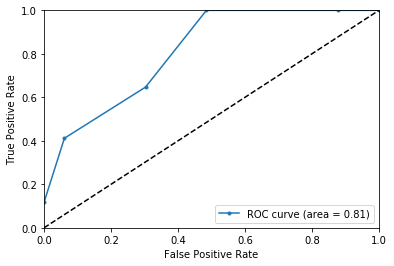

In [83]:
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,KNeighborsClassifier)
generate_ROCplot(fpr,tpr,'LR',roc_auc)

Compared with logistic regression method, KNN doesn't perform well. The range of accurancy is large and AUC is 0.801.

## Decision Tree

The optimal depth is 3


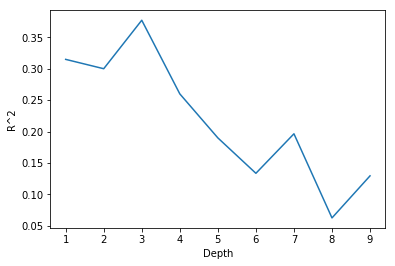

In [84]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")


# Find the optimal depth of the tree
scores=[]
depths = range(1,10)
for n in depths:
    DT = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    DT.fit(X_train, y_train)
    scores.append(DT.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
print("The optimal depth is", n_opt)

[ 0.51151905  0.29463329  0.18948387  0.38044437  0.0172639 ]


Text(0.5,1,'Results on 5 folds')

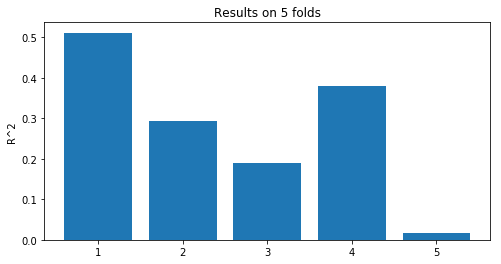

In [85]:
# Perform 5-fold cross validation on trainning set using optimal max_depth=6
DT = DecisionTreeRegressor(max_depth=3)
results = cross_val_score(DT, X_train, y_train, cv = 5)
print(results)
fig = plt.figure(figsize=(8,4))
index = [1,2,3,4,5]
plt.bar(index, results)
plt.ylabel('R^2')
plt.title('Results on 5 folds')

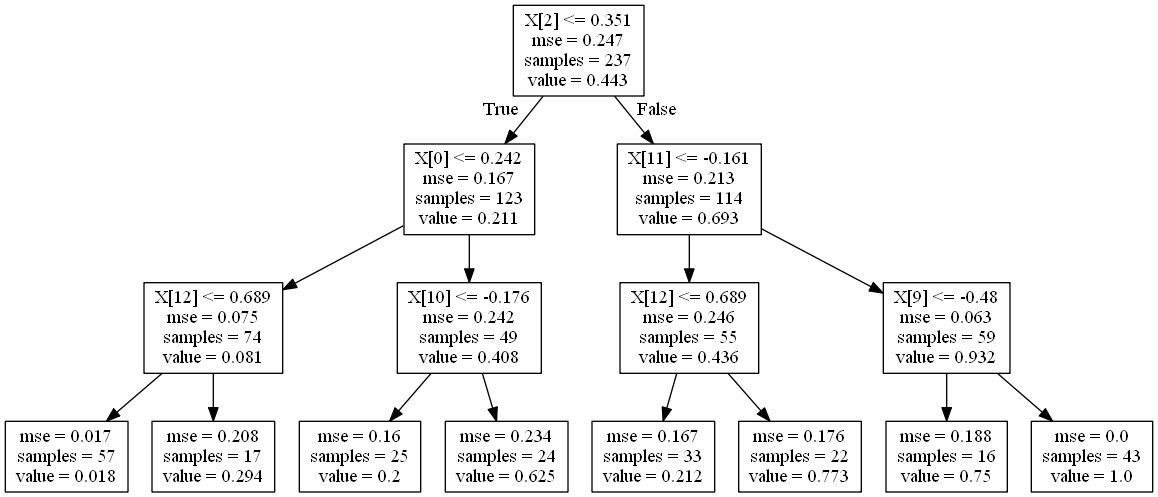

In [86]:
# Plot the tree using the optimal max_depth=3
DT = DecisionTreeRegressor(max_depth=3)
DT.fit(X_train, y_train)
visualize_tree(DT, feature_names=['x'])
dot_data=export_graphviz(DT, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Area under the ROC curve : 0.923351


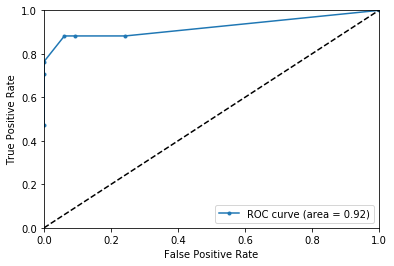

In [87]:
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth=3)
generate_ROCplot(fpr,tpr,'LR',roc_auc)

The optimal depth is 3. $R^2$ is not good enough. AUC is 0.923.

## Random Forest Classifier

In [88]:
# We use default values for all parameters
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.833333333333


[ 0.79166667  0.8125      0.78723404  0.72340426  0.76595745]


Text(0.5,1,'Results on 5 folds')

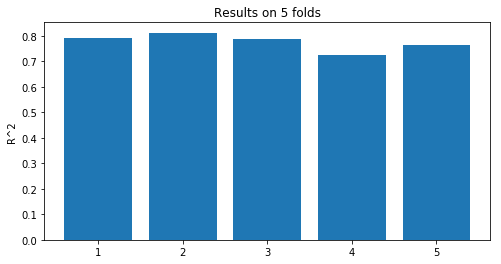

In [89]:
# Perform 5-fold cross validation on trainning set using default values
RF = RandomForestClassifier()
results = cross_val_score(RF, X_train, y_train, cv = 5)
print(results)
fig = plt.figure(figsize=(8,4))
index = [1,2,3,4,5]
plt.bar(index, results)
plt.ylabel('R^2')
plt.title('Results on 5 folds')

Area under the ROC curve : 0.911765


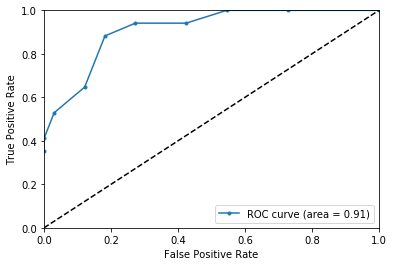

In [90]:
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,RandomForestClassifier)
generate_ROCplot(fpr,tpr,'LR',roc_auc)